<a href="https://colab.research.google.com/github/arunravi8595/CE888_Assignment_2/blob/main/UK_police_bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [324]:
#Import required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier


In [325]:

#To find ethnicity distribution in Stop & Search by Police
#Data downloaded from https://data.police.uk/data/
Police_search = pd.read_csv('https://raw.githubusercontent.com/arunravi8595/CE888/main/Assignment/2020-12-essex-stop-and-search.csv') 


In [326]:
Police_search.shape

(422, 15)

In [327]:
#Check NaN in data
Police_search.isnull().sum()

Type                                          0
Date                                          0
Part of a policing operation                  0
Policing operation                          422
Latitude                                      4
Longitude                                     4
Gender                                       37
Age range                                    45
Self-defined ethnicity                       37
Officer-defined ethnicity                    48
Legislation                                   0
Object of search                              0
Outcome                                       3
Outcome linked to object of search            0
Removal of more than just outer clothing     37
dtype: int64

In [328]:
# Drop columns with NaN values
Police_search = Police_search[Police_search["Outcome"].notna()]

In [329]:
Police_search.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person and Vehicle search,2020-12-01T00:01:00+00:00,False,NaN,51.881413,0.215455,Female,25-34,Other ethnic group - Not stated,White,Police and Criminal Evidence Act 1984 (section 1),Articles for use in criminal damage,A no further action disposal,False,False
1,Person search,2020-12-01T00:01:00+00:00,False,NaN,51.636110,0.062590,Female,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False
2,Person search,2020-12-01T00:01:00+00:00,False,NaN,51.636546,0.063333,Male,18-24,Black/African/Caribbean/Black British - Caribbean,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False
3,Person search,2020-12-01T01:01:00+00:00,False,NaN,51.629479,0.439730,Male,18-24,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False
4,Vehicle search,2020-12-01T01:01:00+00:00,False,NaN,51.629479,0.439730,NaN,NaN,NaN,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,NaN


In [330]:
#Taking only the required columns from the dataset

Police_search = Police_search[['Type','Gender','Age range','Officer-defined ethnicity','Outcome','Outcome linked to object of search']]
data = Police_search.dropna()
data = data.reset_index(drop=True)
data.describe()

,Type,Gender,Age range,Officer-defined ethnicity,Outcome,Outcome linked to object of search
count,364,364,364,364,364,364
unique,2,2,4,4,5,2
top,Person search,Male,18-24,White,A no further action disposal,False
freq,287,325,159,294,284,288


**Understanding the field of importance in the data**

To know which part of the data to be checked for bias. Visualising the information from the stop and search can provide a general idea on what part needs to be analyzed.
The main task is to find how ethnicity plays a role in police search. So the information that is related to ethnic distribution is considered.

In [331]:
Police_search["Officer-defined ethnicity"].value_counts()

White    302
Black     46
Asian     12
Other     12
Name: Officer-defined ethnicity, dtype: int64

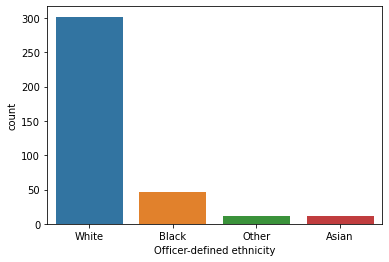

In [332]:
#Plot ethnicity distribution
sns.countplot(x="Officer-defined ethnicity", data = Police_search)

In [333]:
#Combine different Non-white categoriess into a single class

Ethnicity = []
for x in Police_search["Officer-defined ethnicity"]:
  if x == "White":
    y = "White"  
  elif x == "Other":
    y = "Other"
  else:
    y = "Non-White"     
  Ethnicity.append(y)       
  
Police_search["Ethnicity"] = Ethnicity        

In [334]:
Police_search["Ethnicity"].value_counts()

White        302
Non-White    105
Other         12
Name: Ethnicity, dtype: int64

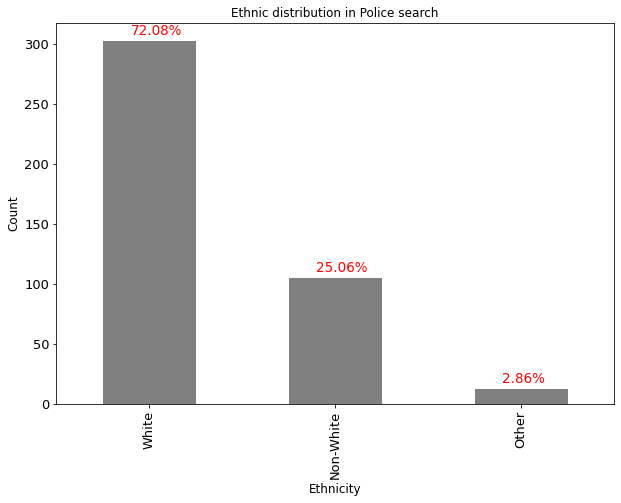

In [335]:
graph = Police_search['Ethnicity'].value_counts().plot(kind='bar', figsize=(10,7),
                                                  color="grey", fontsize=13);
graph.set_alpha(0.8)
graph.set_title("Ethnic distribution in Police search", fontsize=12)
graph.set_ylabel('Count', fontsize=12)
graph.set_xlabel('Ethnicity', fontsize=12)

totals = []

# find the values and append to list
for i in graph.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in graph.patches:
    # get_x pulls left or right; get_height pushes up or down
    graph.text(i.get_x()+0.15, i.get_height()+5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=13.5,
                color='red')

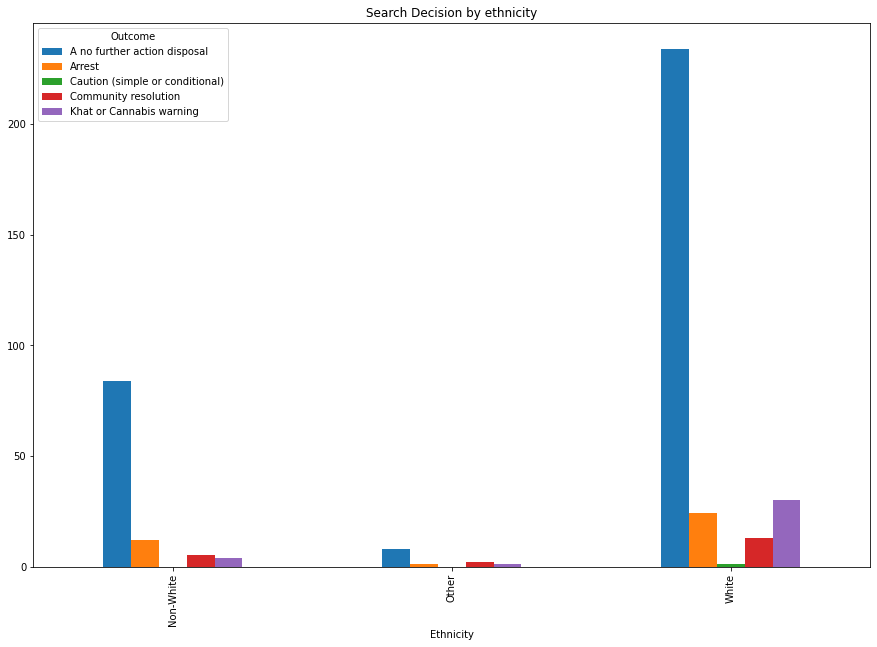

In [336]:
#To find the outcome decision taken by police officers based on ethnicity
Police_search.groupby('Outcome')['Ethnicity'].value_counts().unstack(0).plot.bar(title='Search Decision by ethnicity', figsize=(15,10));

In [337]:
# In the data, "Outcome linked to object of search" specifies whether the suspect has been arrested or not
# Hence the column is renamed as "Arrested" which has the info as TRUE or FALSE
Police_search.rename(columns = {'Outcome linked to object of search':'Arrested'}, inplace = True)
Police_search["Arrested"].value_counts()

False    332
True      87
Name: Arrested, dtype: int64

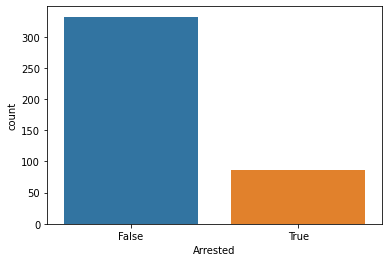

In [338]:
sns.countplot(x = "Arrested", data = Police_search)

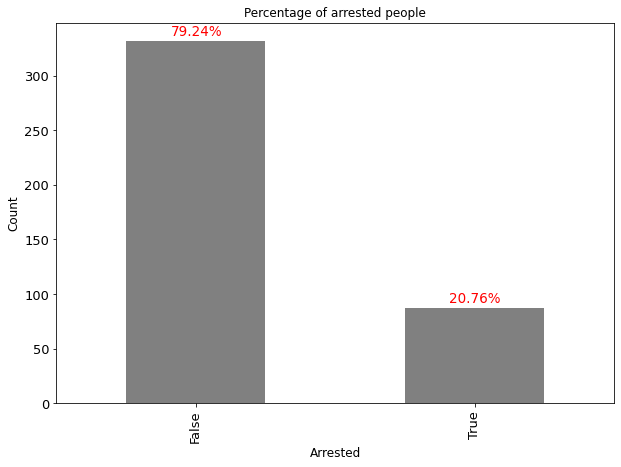

In [339]:
graph = Police_search['Arrested'].value_counts().plot(kind='bar', figsize=(10,7),
                                                  color="grey", fontsize=13);
graph.set_alpha(0.8)
graph.set_title("Percentage of arrested people", fontsize=12)
graph.set_ylabel('Count', fontsize=12)
graph.set_xlabel('Arrested', fontsize=12)

totals = []

# find the values and append to list
for i in graph.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in graph.patches:
    # get_x pulls left or right; get_height pushes up or down
    graph.text(i.get_x()+0.16, i.get_height()+5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=13.5,
                color='red')

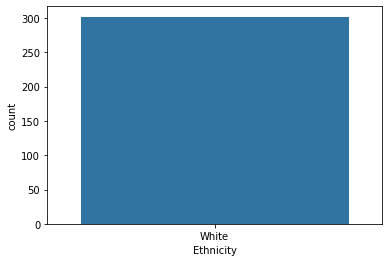

In [340]:
Arrested_race = Police_search[Police_search["Ethnicity"] == "White"]
sns.countplot(x="Ethnicity", data = Arrested_race)

In [341]:
#Manually encoding ethnicity and arrest columns

Police_search.loc[Police_search.Ethnicity == "White","Ethnicity"] = 0
Police_search.loc[Police_search.Ethnicity == "Non-white","Ethnicity"] = 1


In [342]:
Police_search['Arrested'].value_counts(normalize=True).mul(100).astype(str)+'%'

False     79.23627684964201%
True     20.763723150357997%
Name: Arrested, dtype: object

In [343]:
arrested_df = Police_search[Police_search["Arrested"] == "True"]
sns.countplot(x = "Ethnicity", data = arrested_df)

ValueError: ignored

In [ ]:
Police_search["Gender"].value_counts()

In [ ]:
Ethnic_Arrest = Police_search[Police_search["Arrested"] == "TRUE"]
sns.countplot(x = "Ethnicity", data = Ethnic_Arrest)

**Detection of Bias and Mitigation**

Using AIF360 ML Algorithm to address the fairness metrics

In [ ]:
#importing required library packages:

import sys
sys.path.insert(1, "../")  

import numpy as np
np.random.seed(0)

!pip install aif360
!pip install 'tensorflow>=1.13.1,< 2'

import tensorflow as tf

from aif360.datasets import GermanDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import Reweighing
from aif360.algorithms.preprocessing.reweighing import Reweighing


from IPython.display import Markdown, display

In [ ]:
privileged_groups = [{'Ethnicity': 'White'}]
unprivileged_groups = [{'Ethnicity': 'Non-white'}]
favorable_label = 1 
unfavorable_label = 0

In [ ]:
from sklearn import preprocessing

categorical_column = ['Ethnicity', 'Outcome', 'Arrested',]
data_encoded = Police_search.copy(deep=True)
#Use Scikit-learn label encoding to encode character data
lab_enc = preprocessing.LabelEncoder()
for col in categorical_column:
        data_encoded[col] = lab_enc.fit_transform(Police_search[col])
        le_name_mapping = dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_)))
        print('Feature', col)
        print('mapping', le_name_mapping)
        

data_encoded.head()

In [ ]:
pip install -U scikit-learn scipy matplotlib


In [ ]:
from sklearn_label_encoder import PipelineLabelEncoder

preprocessed_data = PipelineLabelEncoder(columns = ['Ethnicity','Outcome', 'Person Arrested']).fit_transform(data_encoded)

In [ ]:
dataset_orig = Police_search(
    protected_attribute_names=['Ethnicity'],      
    )

dataset_orig_train, dataset_orig_test = dataset_orig.split([0.7], shuffle=True)

privileged_groups = [{'Ethnicity': 'White'}]
unprivileged_groups = [{'Ethnicity': 'Non-White'}]

In [346]:
census_data = pd.read_csv('https://raw.githubusercontent.com/arunravi8595/CE888/main/Assignment/Essex_Ethnicity_Census.csv') 
census_data.shape

(23, 16)

In [347]:
#Check NaN in data
census_data.isnull().sum()

Category              0
Essex                 0
Basildon              0
Braintree             0
Brentwood             0
Castle Point          0
Chelmsford            0
Colchester            0
Epping Forest         0
Harlow                0
Maldon                0
Rochford              0
Tendring              0
Uttlesford            0
Southend-on-Sea UA    0
Thurrock UA           0
dtype: int64

In [348]:
census_data.head()

,Category,Essex,Basildon,Braintree,Brentwood,Castle Point,Chelmsford,Colchester,Epping Forest,Harlow,Maldon,Rochford,Tendring,Uttlesford,Southend-on-Sea UA,Thurrock UA
0,White: British,1264877,156215,137010,65688,83943,151990,151453,106233,68715,59011,79628,131666,73325,151136,127587
1,White: Irish,11165,1313,1051,921,527,1450,1155,1427,875,358,468,998,622,1496,1108
2,White: Gypsy or Irish Traveller,2161,873,132,121,17,212,79,176,117,201,49,62,122,162,308
3,White: Other White,35653,3276,3894,2138,786,4331,6619,5033,3292,859,792,1941,2692,6229,6426
4,Mixed/multiple ethnic group: White and Black C...,6936,1131,554,343,346,854,889,881,654,152,296,595,241,1039,1056


In [349]:
list(census_data.columns.values)

['Category',
 'Essex ',
 'Basildon',
 'Braintree',
 'Brentwood',
 'Castle Point',
 'Chelmsford',
 'Colchester',
 'Epping Forest',
 'Harlow',
 'Maldon',
 'Rochford',
 'Tendring',
 'Uttlesford',
 'Southend-on-Sea UA',
 'Thurrock UA']

In [350]:
census_data.rename(columns = {'Essex ':'Essex'}, inplace = True)
census = census_data[['Category','Essex']]
census.head()

,Category,Essex
0,White: British,1264877
1,White: Irish,11165
2,White: Gypsy or Irish Traveller,2161
3,White: Other White,35653
4,Mixed/multiple ethnic group: White and Black C...,6936


In [351]:
census.set_index('Category')


,Essex
Category,
White: British,1264877
White: Irish,11165
White: Gypsy or Irish Traveller,2161
White: Other White,35653
Mixed/multiple ethnic group: White and Black Caribbean,6936
Mixed/multiple ethnic group: White and Black African,2801
Mixed/multiple ethnic group: White and Asian,6173
Mixed/multiple ethnic group: Other Mixed,4975
Mixed/Multiple Ethnic Group (Total),20885


In [352]:
print (census.dtypes)

Category    object
Essex        int64
dtype: object


In [353]:
census['Ethnic_percent'] = 100*census['Essex']/census['Essex'].sum()
display(census)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Category,Essex,Ethnic_percent
0,White: British,1264877,81.444758
1,White: Irish,11165,0.718908
2,White: Gypsy or Irish Traveller,2161,0.139146
3,White: Other White,35653,2.295678
4,Mixed/multiple ethnic group: White and Black C...,6936,0.446605
5,Mixed/multiple ethnic group: White and Black A...,2801,0.180355
6,Mixed/multiple ethnic group: White and Asian,6173,0.397476
7,Mixed/multiple ethnic group: Other Mixed,4975,0.320338
8,Mixed/Multiple Ethnic Group (Total),20885,1.344774
9,Asian/Asian British: Indian,12456,0.802035


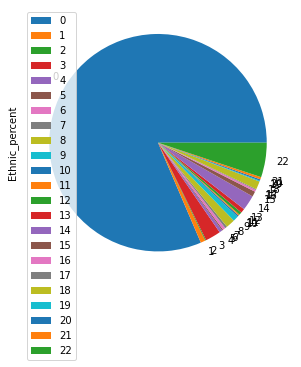

In [354]:
plot = census.plot.pie(y='Ethnic_percent', figsize=(5, 5))


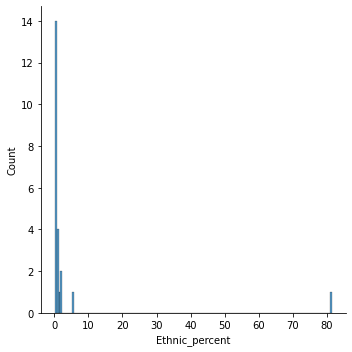

In [344]:

sns.displot(x="Ethnic_percent", data = census)

In [ ]:
census_data['Essex'] = census_data.index
sns.countplot(x = "Essex", data = census_data)
#sns.factorplot(x='Essex', data=census_data)

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(y="0", data=dfWIM, order=[3,4,5,6,7,8,9,10,11,12])
plt.title('Distribution of Truck Configurations')
plt.xlabel('Number of Axles')
plt.ylabel('Frequency [%]')

for p in ax.patches:
        ax.annotate('%{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [ ]:
#Combine similar ethnic groups together
#Make ethnic classifications to match Data1 - Police search

In [ ]:
#Load Data-3
#To find ethnic distribution across the Police workforce
#Data downloaded from https://www.ethnicity-facts-figures.service.gov.uk/workforce-and-business/workforce-diversity/police-workforce/latest#by-ethnicity-police-officers
Workforce_data=pd.read_csv('https://raw.githubusercontent.com/arunravi8595/CE888/main/Assignment/by-ethnicity-police-officers-table.csv')

In [ ]:
Workforce_data.head()

In [ ]:
sns.displot(Workforce_data, bins=30, kde=True, rug=True)

In [ ]:
sns.jointplot(x='% of police officers', y='% of population', data=Workforce_data)

In [ ]:
#Compare Dataset 2 and 3 (Ethnicity in workforce and Census)
#Result of this Data will be either a match or difference between them
#If there is no percentage difference then the employment is distributed to all ethnicity equally
#If there is a difference between them, then compare the result with Data 1 (Police search) to find if the predominant ethnicity has any influence